**1** generate points

[[13.04799543 33.73941139 28.58945948  2.39482074 21.86614005 34.18067925
  34.24910846 34.65783843  7.46266908 37.5003053  28.42388929 39.45967249
  30.83501475 36.97774888 38.62101528  3.5931429  32.60129977 35.1473925
  28.51819144 38.88497755]
 [11.99762222 46.74596024  9.18363121 44.82830825 45.18898304 33.0743597
  41.14353903  5.0636806  39.95622138  8.7396499  30.55336849 16.86014279
   4.55363536 14.75414042 30.16574844 32.13680389  3.1470877  26.33918801
  36.90676886 31.72104021]]
[[13.04799543 11.99762222]
 [33.73941139 46.74596024]
 [28.58945948  9.18363121]
 [ 2.39482074 44.82830825]
 [21.86614005 45.18898304]
 [34.18067925 33.0743597 ]
 [34.24910846 41.14353903]
 [34.65783843  5.0636806 ]
 [ 7.46266908 39.95622138]
 [37.5003053   8.7396499 ]
 [28.42388929 30.55336849]
 [39.45967249 16.86014279]
 [30.83501475  4.55363536]
 [36.97774888 14.75414042]
 [38.62101528 30.16574844]
 [ 3.5931429  32.13680389]
 [32.60129977  3.1470877 ]
 [35.1473925  26.33918801]
 [28.51819144 36.

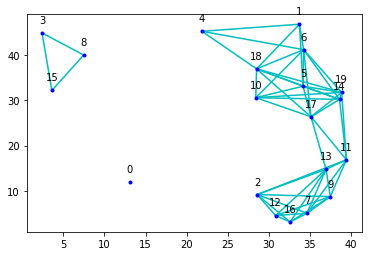

In [22]:
import numpy as np, datetime
from scipy import spatial
import matplotlib.pyplot as plt

fieldSize = 50
numNodes = 20
maxDistance = 15

xy = np.multiply(np.random.rand(2, numNodes), fieldSize)
print(xy)

# generate points
points = np.column_stack(xy)
print(points)

# plot connections
label = 0
kdTree = spatial.cKDTree(points)
pairs = list(kdTree.query_pairs(maxDistance))

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'c-')
    
for i in pairs:
    connectpoints(xy[0], xy[1], i[0], i[1])
    
# plot points
plt.plot(xy[0], xy[1], 'b.') 
    
# plot labels
for x, y in zip(xy[0], xy[1]):
    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    label = label + 1

plt.show()


**2** generate distances matrix

In [14]:
kdTree = spatial.cKDTree(points)
dists = kdTree.sparse_distance_matrix(kdTree, maxDistance)

# Randomize distances matrix (or not)
rdists = dists.toarray() * np.random.normal(1, 0.1, dists.shape)
print(rdists)

[[ 0.          0.         11.14707816  0.          0.         11.83621123
   0.          0.          0.          0.          0.          4.20900506
   0.          0.          0.          0.          0.          0.
   0.          3.71675359]
 [ 0.          0.          0.          0.          0.          0.
  15.59946216  0.          9.95784643 12.28393274  0.          0.
   4.32458972 13.49378702  6.18282909 10.66171904  8.88683167  9.09064618
   4.8271925   0.        ]
 [11.41631242  0.          0.          0.          0.         12.74171747
   0.          0.          0.         15.06526485 10.05393912 10.29263148
   0.          0.          0.          0.          0.          0.
   0.         13.09884621]
 [ 0.          0.          0.          0.         10.5339484   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         11.36466884  0.       

In [15]:
# insert cheating into distances matrix
cdists = np.copy(rdists)
print(cdists[3,12])
cdists[3,12] = 20
print(cdists[3,16])
cdists[3,16] = 10


print(cdists)

0.0
0.0
[[ 0.          0.         11.14707816  0.          0.         11.83621123
   0.          0.          0.          0.          0.          4.20900506
   0.          0.          0.          0.          0.          0.
   0.          3.71675359]
 [ 0.          0.          0.          0.          0.          0.
  15.59946216  0.          9.95784643 12.28393274  0.          0.
   4.32458972 13.49378702  6.18282909 10.66171904  8.88683167  9.09064618
   4.8271925   0.        ]
 [11.41631242  0.          0.          0.          0.         12.74171747
   0.          0.          0.         15.06526485 10.05393912 10.29263148
   0.          0.          0.          0.          0.          0.
   0.         13.09884621]
 [ 0.          0.          0.          0.         10.5339484   0.
   0.          0.          0.          0.          0.          0.
  20.          0.          0.          0.         10.          0.
   0.          0.        ]
 [ 0.          0.          0.         11.36466884  0

**3** generate disagreement matrix

In [16]:
disagrees = np.abs(cdists - cdists.T)
print(disagrees)

[[ 0.          0.          0.26923426  0.          0.          0.676927
   0.          0.          0.          0.          0.          0.55064716
   0.          0.          0.          0.          0.          0.
   0.          0.21952761]
 [ 0.          0.          0.          0.          0.          0.
   3.12581935  0.          1.17437497  1.13084919  0.          0.
   0.69114491  0.21710382  0.39728677  0.15609177  1.48641431  0.43748989
   1.28083028  0.        ]
 [ 0.26923426  0.          0.          0.          0.          0.63561023
   0.          0.          0.          3.17683474  0.39946717  2.2660478
   0.          0.          0.          0.          0.          0.
   0.          0.60465549]
 [ 0.          0.          0.          0.          0.83072044  0.
   0.          0.          0.          0.          0.          0.
  20.          0.          0.          0.         10.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.83072044  0.          

**4** SVD with disagreement matrix

[[ 1.70687664e+00 -1.61792240e+00]
 [ 1.02734188e+00 -1.01131439e+00]
 [ 1.87715543e-01  1.70370955e-01]
 [ 1.45021888e+01  1.44913083e+01]
 [ 1.40408260e-02 -1.48266964e-03]
 [ 5.31650898e-02 -4.33756425e-02]
 [ 3.19694807e-01  5.58930759e-02]
 [ 5.78957045e-02 -4.60448030e-02]
 [ 3.12950672e-29 -2.65360937e-29]
 [-6.04885198e-18  4.65259188e-18]
 [-1.47846840e-16  1.13719266e-16]
 [ 2.00776269e-01 -4.95758983e-02]
 [ 1.42144054e+01 -1.42252068e+01]
 [ 5.32959109e-01  4.97285342e-01]
 [ 1.10488132e+00  1.04235404e+00]
 [ 4.95687812e-01 -4.55725030e-01]
 [ 2.09689200e+00 -1.95541787e+00]
 [ 1.52344213e+00 -1.34835472e+00]
 [ 1.97619265e-16 -2.04546013e-16]
 [ 9.16265930e-01  8.47407452e-01]]


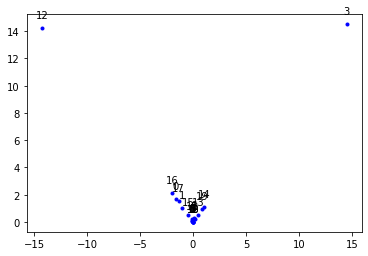

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
transformed = svd.fit_transform(disagrees)
print(transformed)

rotated = np.rot90(transformed)

plt.plot(rotated[0], rotated[1], 'b.')

label = 0
for x, y in zip(rotated[0], rotated[1]):
    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    label = label + 1  

plt.show()

**5** compute disagreement metric per node

In [17]:
rowsum = np.sum(disagrees, axis=1)
print(rowsum)
nonzerocount = np.count_nonzero(disagrees, axis=1)
print(nonzerocount)
dismetric = rowsum / nonzerocount

print(dismetric)

# 3 is the cheating node, and 12 and 16 are the nodes it lied about
print(dismetric[3])
print(dismetric[12])
print(dismetric[16])



[ 1.71633602 10.09740525  7.35184968 30.83072044  3.19490477  4.89546813
  4.74654888  0.         11.19844074  5.71850658  1.91532414  6.77440077
 29.30488704  2.06731546  6.11554608  5.99089575 17.61420242  2.3731855
  7.16371548  3.75306882]
[ 4 10  6  3  2  5  4  0  7  6  3  5 10  5  7  7  8  5  9  4]
[ 0.42908401  1.00974053  1.22530828 10.27690681  1.59745238  0.97909363
  1.18663722         nan  1.59977725  0.95308443  0.63844138  1.35488015
  2.9304887   0.41346309  0.87364944  0.85584225  2.2017753   0.4746371
  0.79596839  0.93826721]
10.276906813591005
2.9304887043203047
2.2017753024626687


/Users/jehan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


**6** ICA with disagreements matrix

[[ 0.0788031   0.07946829]
 [ 0.02074541  0.06791869]
 [ 0.08365758  0.08443714]
 [-0.95570818  0.0330074 ]
 [ 0.07778361  0.02743921]
 [ 0.08121704  0.08190112]
 [ 0.07860941  0.07141989]
 [ 0.07700082  0.07765195]
 [-0.06608082  0.06126776]
 [ 0.07931048  0.07945023]
 [ 0.07923295  0.07990132]
 [ 0.0829253   0.08361734]
 [ 0.03806515 -0.86579909]
 [ 0.06803738  0.07692052]
 [ 0.05060366  0.06795811]
 [-0.0645431   0.06919872]
 [ 0.00978676 -0.3967429 ]
 [ 0.04955262  0.07701195]
 [ 0.05000533  0.06229455]
 [ 0.08099551  0.08167782]]


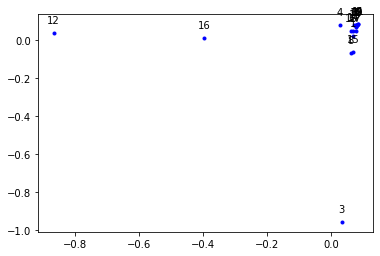

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
transformed = ica.fit_transform(disagrees)
print(transformed)

rotated = np.rot90(transformed)

plt.plot(rotated[0], rotated[1], 'b.')

label = 0
for x, y in zip(rotated[0], rotated[1]):
    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    label = label + 1  

plt.show()